In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", color_codes=True)

path = Path("data/Concatenadas_sinRepes_dropnan_LAMOST.csv")

str_cols = ['ID', 'SpT', 'Type', 'EM', 'Be', 'obsid', 'objtype', 'class', 'subclass', 'B-TS1', 'B-TS2',
       'B-TS', 'EM1', 
       'GroupID', 'GroupSize']
str_cols2 = ["EM1",  "EMobj",  "BeC1",  "EM2",  "Be_EM2",  "BeC2",  "BeC"]
types = {k:str for k in str_cols+str_cols2}
types["umag"]=float
df = pd.read_csv(path,dtype=types)
print(df.head())
fill_columns = {"EM":0,"Be":0}
for column,value in fill_columns.items():
       df[column] = df[column].fillna(value)



                          ID          RA        DEC      SpT Type   EM Be  \
0                  V1493 Cyg  313.019375  44.625119     A2Ve   Be  NaN  1   
1                  HD 237056   45.657833  57.612794  B0.5Vpe   Be  NaN  1   
2                  BD+58 277   25.555167  59.341778       Be   Be  NaN  1   
3  IPHAS J021005.63+631100.3   32.523458  63.183419      NaN   Be  NaN  1   
4  IPHAS J023439.79+641813.4   38.665792  64.303719      NaN   Be  NaN  1   

    Ref   umag   gmag  ...  B-TS  EM1  EMobj  BeC1  EM2  Be_EM2  BeC2  BeC  \
0  BeSS  18.75  16.18  ...     0  NaN    NaN     0    0       0     0    0   
1  BeSS  11.45  12.10  ...     1  NaN    NaN     0    0       0     0    0   
2  BeSS  11.43  12.32  ...     1  NaN    NaN     0    0       0     0    0   
3  BeSS  17.32  16.83  ...   NaN  NaN    NaN     0    0       0     0    0   
4  BeSS  18.88  18.05  ...   NaN  NaN    NaN     0    0       0     0    0   

   GroupID GroupSize  
0      NaN       NaN  
1      NaN       NaN  

In [21]:
print(df.head())
print(df.describe())

                          ID          RA        DEC      SpT Type   EM Be  \
0                  V1493 Cyg  313.019375  44.625119     A2Ve   Be  NaN  1   
1                  HD 237056   45.657833  57.612794  B0.5Vpe   Be  NaN  1   
2                  BD+58 277   25.555167  59.341778       Be   Be  NaN  1   
3  IPHAS J021005.63+631100.3   32.523458  63.183419      NaN   Be  NaN  1   
4  IPHAS J023439.79+641813.4   38.665792  64.303719      NaN   Be  NaN  1   

    Ref   umag   gmag  ...  B-TS  EM1  EMobj  BeC1  EM2  Be_EM2  BeC2  BeC  \
0  BeSS  18.75  16.18  ...     0  NaN    NaN     0    0       0     0    0   
1  BeSS  11.45  12.10  ...     1  NaN    NaN     0    0       0     0    0   
2  BeSS  11.43  12.32  ...     1  NaN    NaN     0    0       0     0    0   
3  BeSS  17.32  16.83  ...   NaN  NaN    NaN     0    0       0     0    0   
4  BeSS  18.88  18.05  ...   NaN  NaN    NaN     0    0       0     0    0   

   GroupID GroupSize  
0      NaN       NaN  
1      NaN       NaN  

Dataset has 3365790 samples and 35 features.


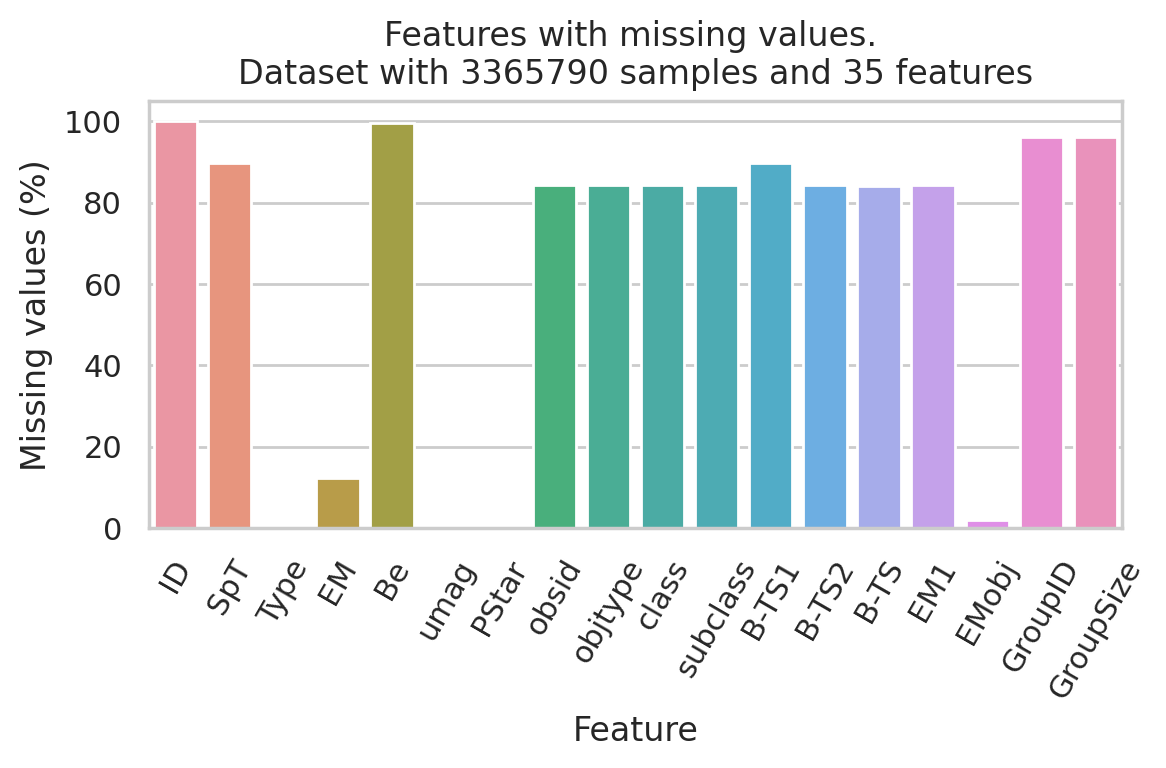

In [45]:

n,m = df.shape
print(f"Dataset has {n} samples and {m} features.")

# print("Features:")
# for c,nulls in zip(df.columns,df.isnull().sum(axis = 0)):
#     print(f"Column {c}: {nulls} nulls ({nulls/n*100:02.1f}%)")

missing_values = df.isnull().sum() / len(df)*100
missing_values = missing_values[missing_values > 0]
# missing_values.sort_values(inplace=True)
missing_values


missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

plt.figure(dpi=200)
ax = sns.barplot(x = 'Name', y = 'count', data=missing_values)
ax.set(xlabel='Feature', ylabel='Missing values (%)')
plt.xticks(rotation = 60)
plt.title(f"Features with missing values. \nDataset with {n} samples and {m} features")
plt.tight_layout()
plt.savefig("reports/aidelman/missing.png")

In [32]:

selected_columns = ['EM','umag','gmag','rmag', 'Hamag', 'imag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag']
df_mag = df[selected_columns]

df_mag=df_mag.dropna()
n_mag = len(df_mag)
print(f"Dropped ({n-n_mag}) samples becasue they contained NaN values in their magnitudes")

df_mag.to_csv("data/predict_em.csv")

Dropped (414926) samples becasue they contained NaN values in their magnitudes


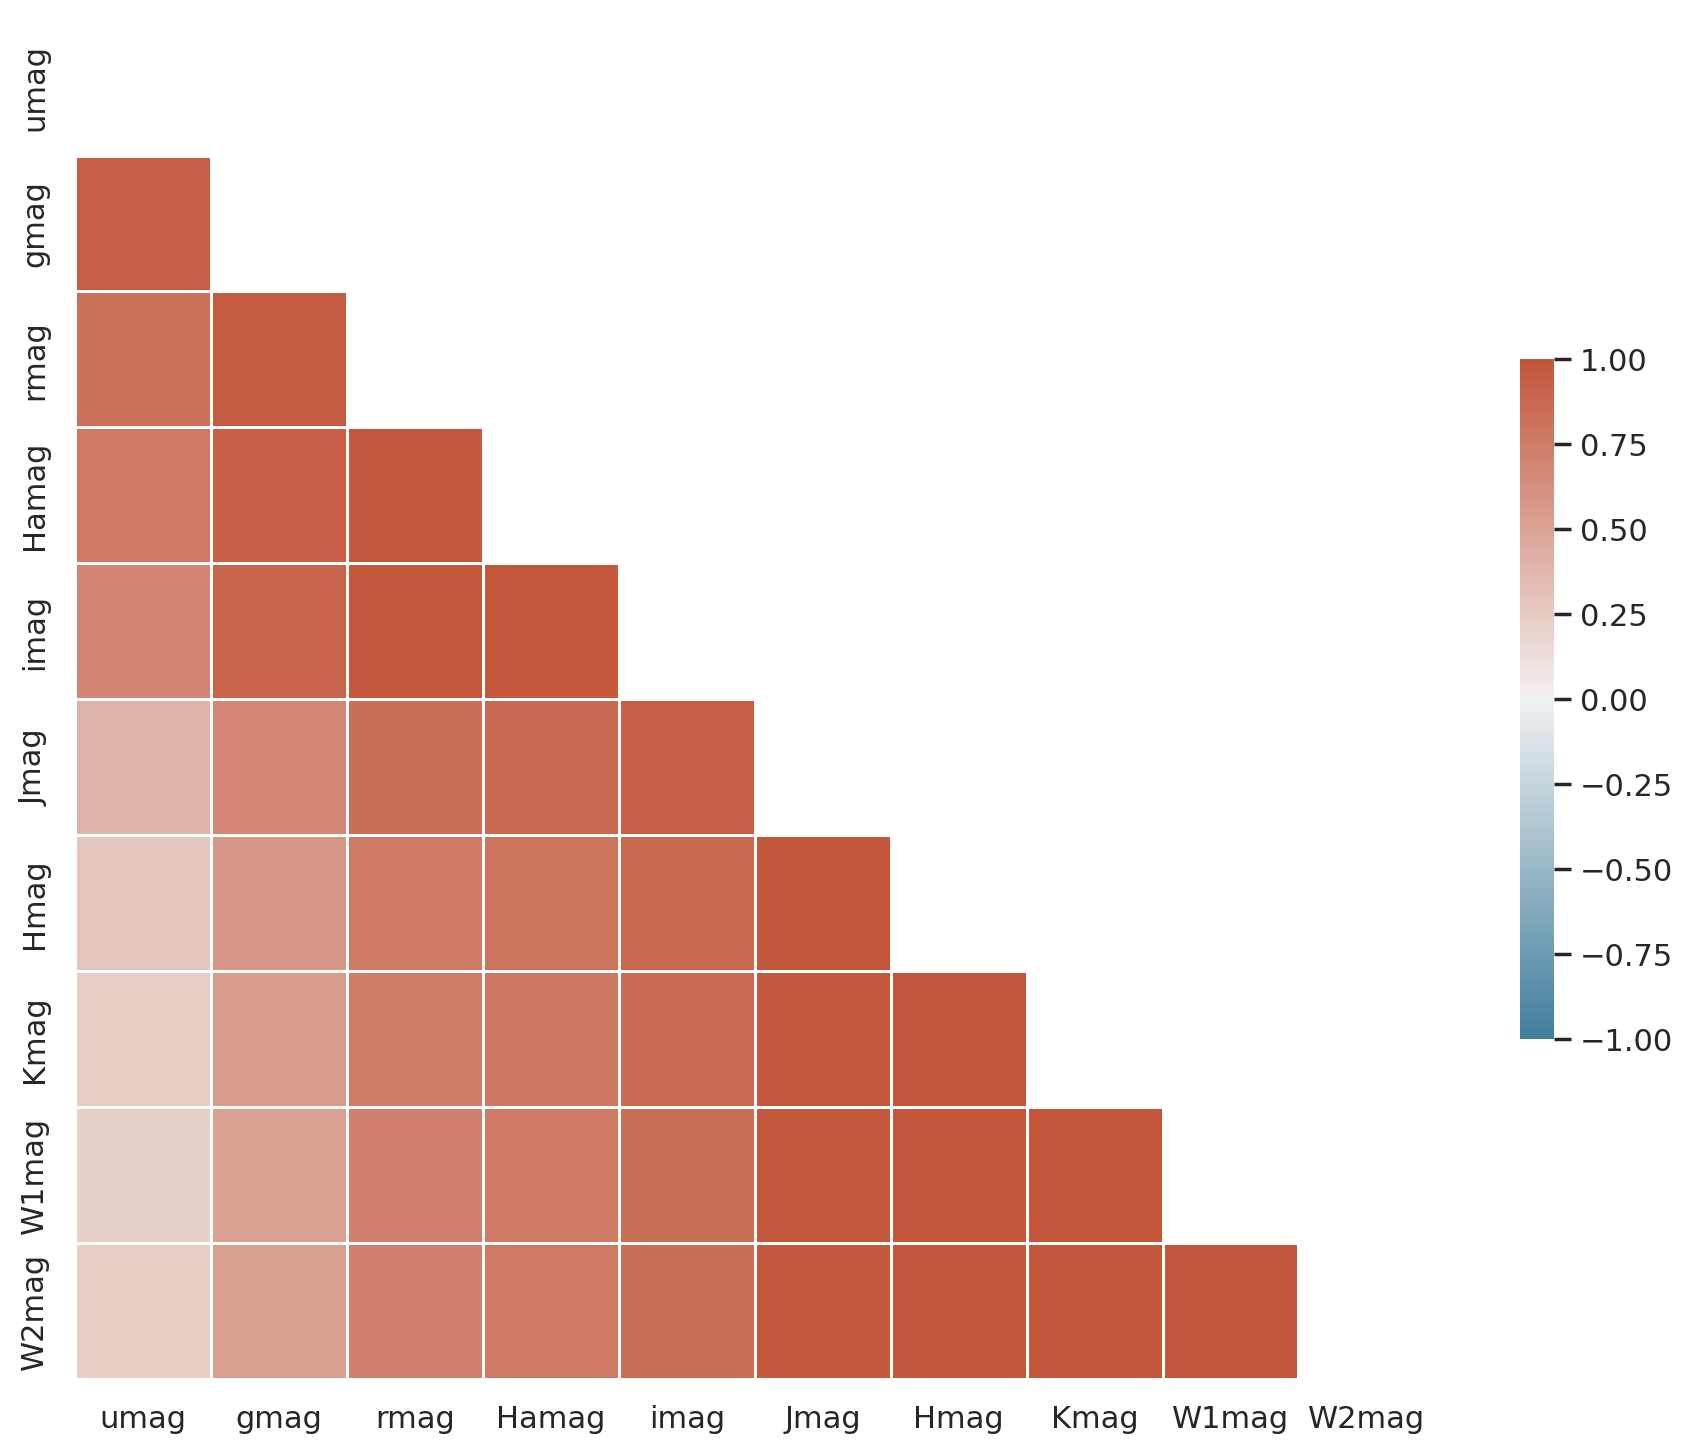

In [41]:

corr = df_mag.corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9),dpi=200)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig("reports/aidelman/correlation.png")

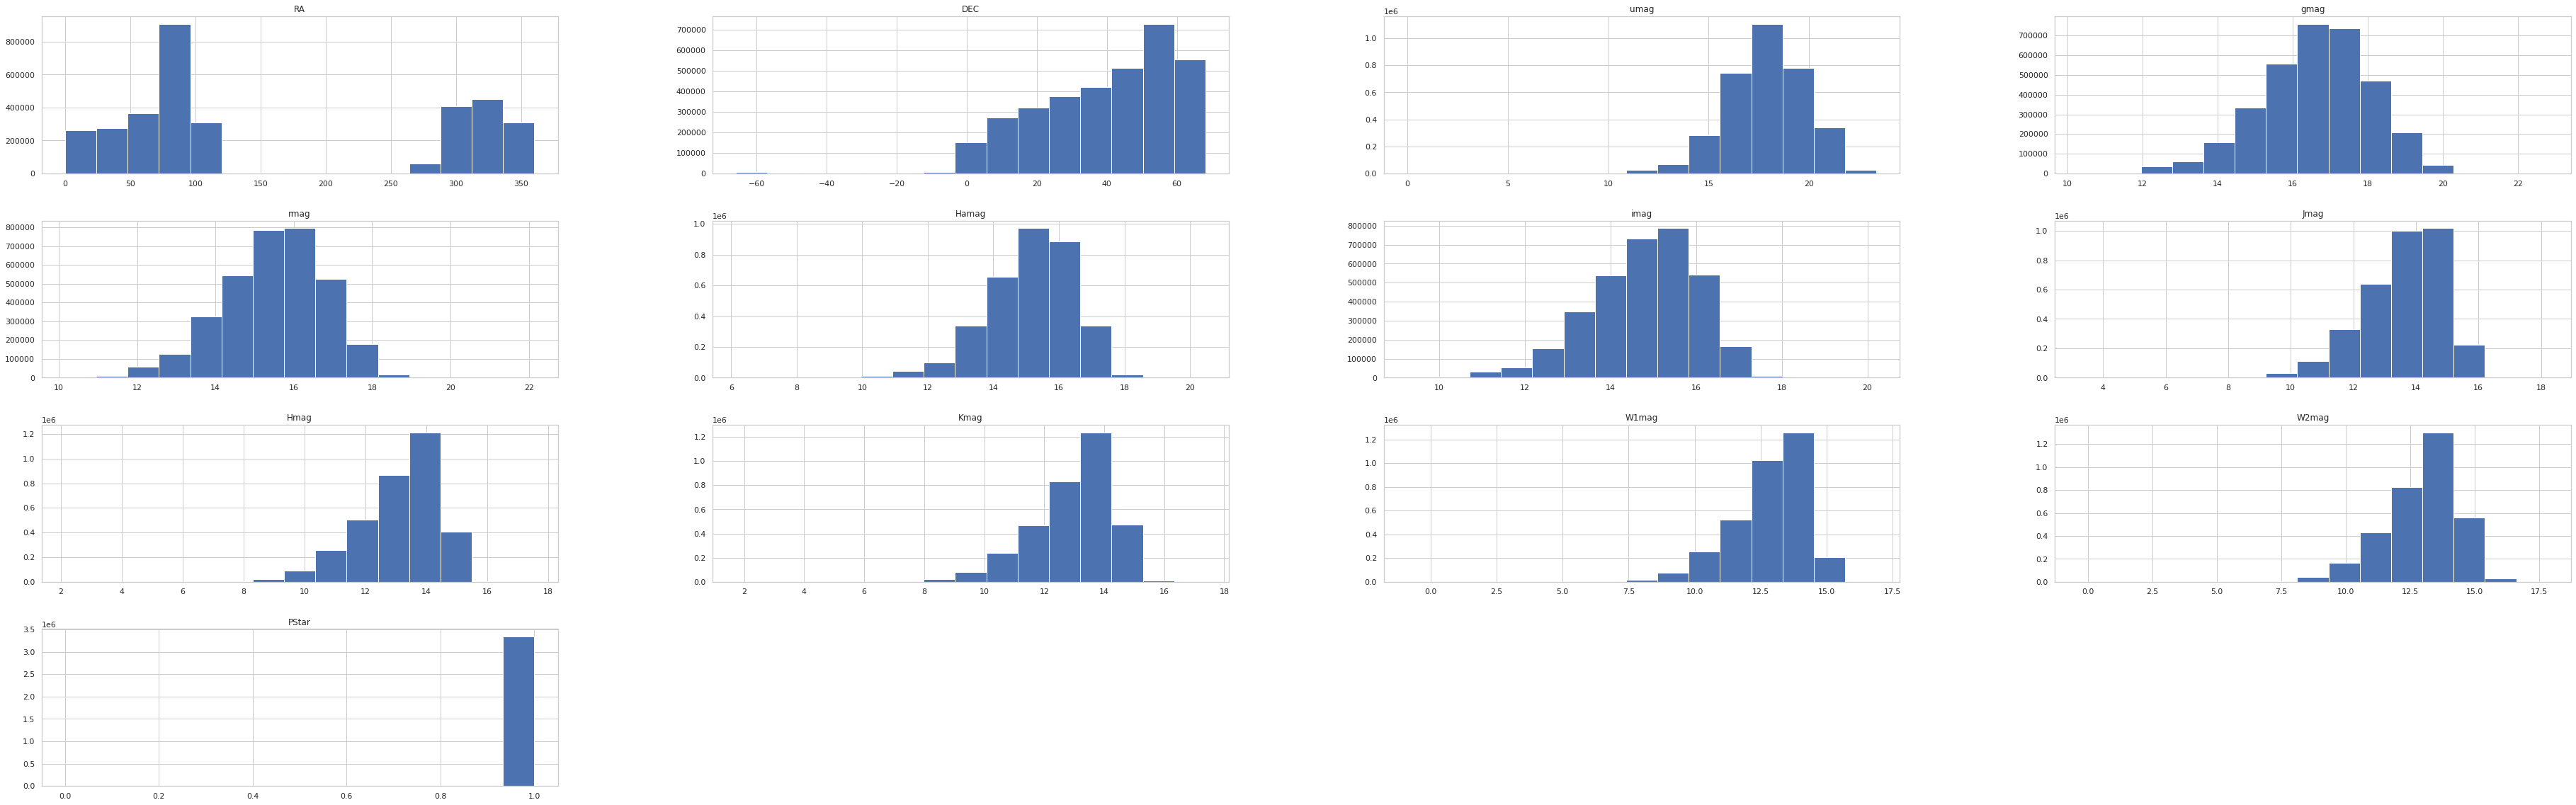

In [49]:
df.hist(bins=15, figsize=(64, 20))
plt.savefig("reports/aidelman/histograms.png")

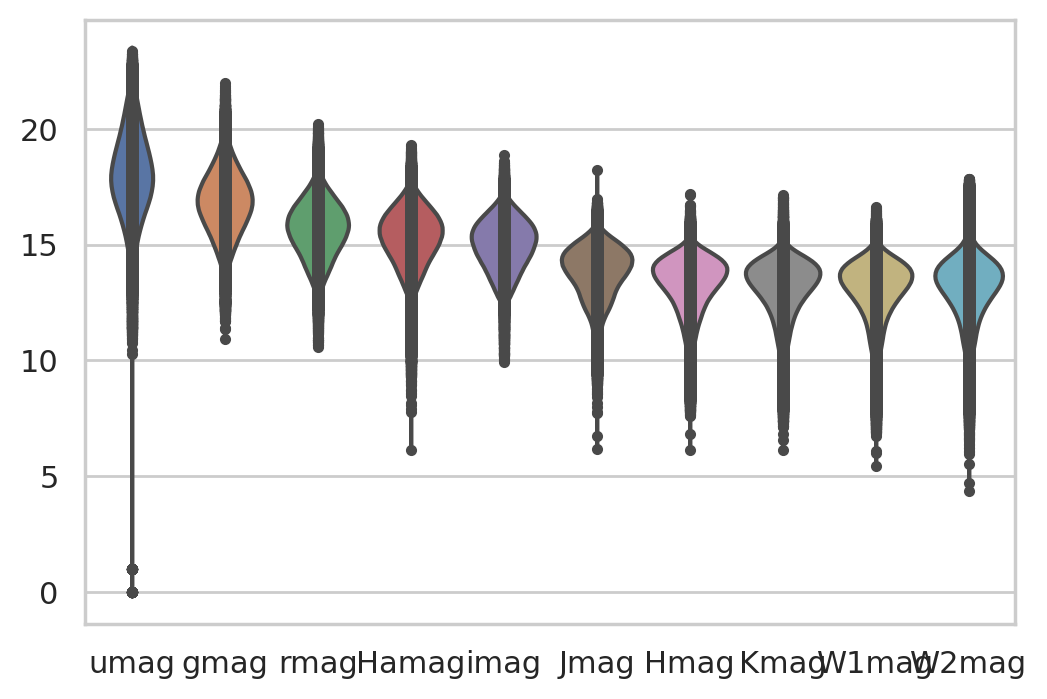

In [47]:
plt.figure(dpi=200)
sns.violinplot(data=df_mag, inner="points")    
plt.tight_layout()
plt.savefig("reports/aidelman/violin.png")

<Figure size 432x288 with 0 Axes>